## Energy Consumption Forecasting System  

##### About the Dataset  
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.  

The hourly power consumption data comes from PJM's website and are in megawatts (MW).  

The regions have changed over the years so data may only appear for certain dates per region.  



### Data Exploration

In [1]:
## importing required libraries
import pandas as pd ## for data manipulation and data handling

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\raw-data\est_hourly.paruqet")

In [3]:
df.shape

(178262, 12)

In [4]:
df.columns ## print the columns of the dataset

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')

In this dataset we are particularly going to work on PJM column as it is the main power line of Eastern Power Grid.

In [5]:
df.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [9]:
df.describe().T ## print the summary statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
AEP,121273.0,15499.513717,2591.399065,9581.0,13630.0,15310.0,17200.00,25695.0
COMED,66497.0,11420.152112,2304.139517,7237.0,9780.0,11152.0,12510.00,23753.0
DAYTON,121275.0,2037.851140,393.403153,982.0,1749.0,2009.0,2279.00,3746.0
DEOK,57739.0,3105.096486,599.859026,907.0,2687.0,3013.0,3449.00,5445.0
DOM,116189.0,10949.203625,2413.946569,1253.0,9322.0,10501.0,12378.00,21651.0
DUQ,119068.0,1658.820296,301.740640,1014.0,1444.0,1630.0,1819.00,3054.0
EKPC,45334.0,1464.218423,378.868404,514.0,1185.0,1386.0,1699.00,3490.0
FE,62874.0,7792.159064,1331.268006,0.0,6807.0,7700.0,8556.00,14032.0
NI,58450.0,11701.682943,2371.498701,7003.0,9954.0,11521.0,12896.75,23631.0
PJME,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.00,62009.0


In [10]:
df.info() ## to get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178262 entries, 1998-12-31 01:00:00+00:00 to 2018-01-02 00:00:00+00:00
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AEP       121273 non-null  float64
 1   COMED     66497 non-null   float64
 2   DAYTON    121275 non-null  float64
 3   DEOK      57739 non-null   float64
 4   DOM       116189 non-null  float64
 5   DUQ       119068 non-null  float64
 6   EKPC      45334 non-null   float64
 7   FE        62874 non-null   float64
 8   NI        58450 non-null   float64
 9   PJME      145366 non-null  float64
 10  PJMW      143206 non-null  float64
 11  PJM_Load  32896 non-null   float64
dtypes: float64(12)
memory usage: 17.7 MB


In [12]:
## checking for duplicate values in the dataset
df.duplicated().sum()

np.int64(16181)

#### Handling duplicates

In [13]:
## removing all the duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(162081, 12)

In [15]:
print(df.index.is_monotonic_increasing)  # to check if the datetime column is sorted or not

False


Lets first sort the Datetime so that it will be easy to go from past to future for further analysis purpose.

In [20]:
df = df.sort_values(by='Datetime', ascending=True)  # sorting the dataframe by datetime column

In [21]:
print(df.index.is_monotonic_increasing)  # to check if the datetime column is sorted or not

True


### Data Cleaning

In our Dataset, we can clearly see that we have so much of missing values. They need to be handled carefully for Forecasting System. We cannot drop those rows as that would shrink our dataset and also harm our model's performance.

In [22]:
## making Datetime column as index
print(type(df.index)) ## check the type of index

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [23]:
## interpolating all columns one by one
for col in df.columns:
    df[col] = df[col].interpolate(method='time', limit=5)


Role of Interpolate method -  
- It does not drop any data.
- It fills gaps by estimating values using the trend of your data over time.
- This helps keep your dataset complete and consistent for forecasting.

In [24]:
## checking for missing values again
print(f"Number of missing values after interpolation: {df.isnull().sum().sum()}")

Number of missing values after interpolation: 870977


The Interpolate method is unable to fill all the missing values. So now we are going to use forward fill and backward fill to fill the NA values.

In [64]:
## filling the missing values using forwar fill and backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

## checking again for missing values
print(f"Number of missing values after ffill/bfill: {df.isnull().sum().sum()}")

Number of missing values after ffill/bfill: 0


It means we have successfully filled all the NA values.

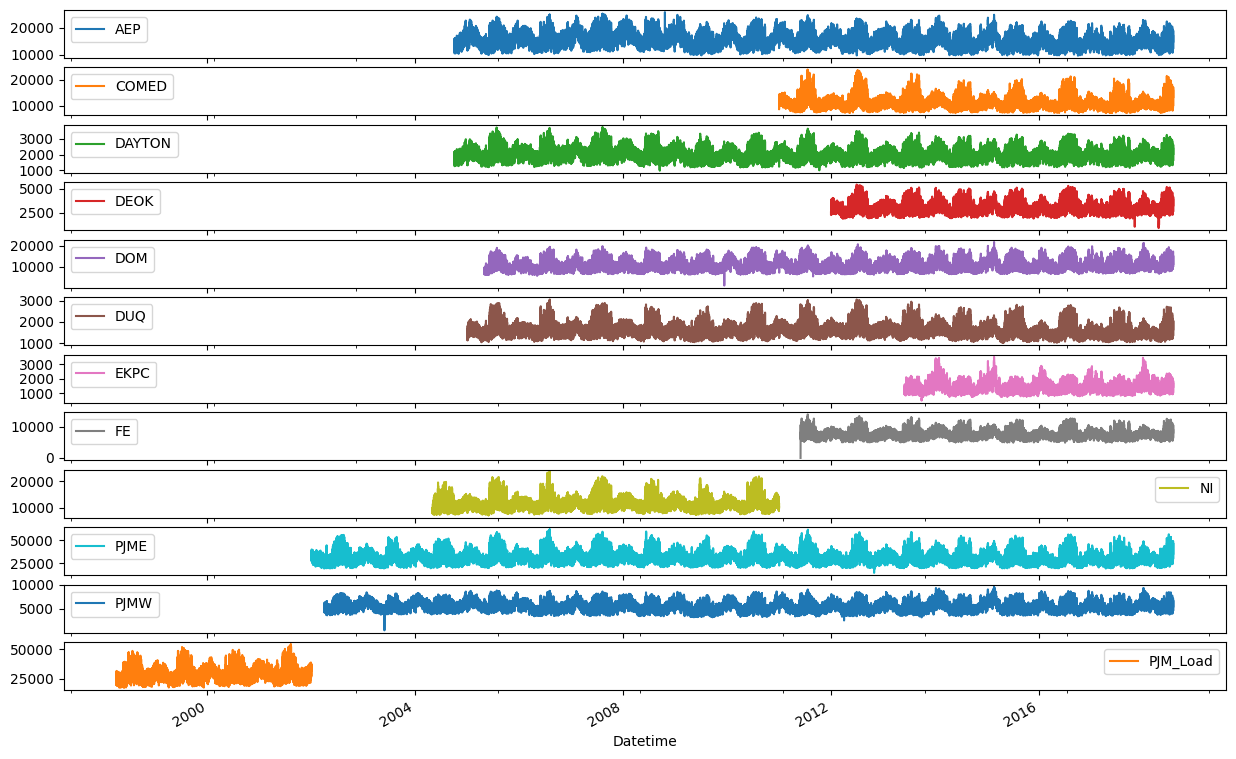

In [30]:
## visualizing distributions to spot outliers
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(15,10))
## saving the picture of graph
plt.savefig("distributions.png")
plt.show()

There is very important info in this graph. We can see that

In [27]:
df.describe() ## to get the statistical information about the dataset

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121275.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58455.000000,145216.000000,143203.000000,16870.000000
mean,15499.501962,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.540980,32081.932459,5602.387415,30417.534795
std,2591.379400,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.446947,6466.281749,979.146918,6864.325518
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.500000,27572.750000,4907.000000,25004.250000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11520.000000,31422.000000,5530.000000,29910.500000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.000000,35656.000000,6252.000000,34902.750000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


From the .describe() method, we can see that our dataset contains outliers. We need to handle them so that they don't impact our model's prediction.

In [ ]:
"""features_only = df.columns.difference(['PJM_Load'])

Q1 = df[features_only].quantile(0.25)
Q3 = df[features_only].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[features_only] = df[features_only].clip(lower=lower_bound, upper=upper_bound, axis=1)"""

In [32]:
## Cap (clip) outliers to the IQR bounds
##df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

##df_capped.describe() ## to get the statistical information about the dataset after capping

We can see that we have clipped the outliers into our upper bound.

In [34]:
## saving the cleaned dataset
df.to_parquet("C:/Users/himan/Desktop/Projects/Energy_Forecasting_System/data/processed-data/est_hourly_cleaned.parquet")